Indice:

1. Presentación de la empresa, organización o problema específico.
2. Preguntas y objetivos de la investigación.
3. Conformación del equipo de trabajo.
4. Indicación de la fuente del dataset y los criterios de selección (Data Acquisition).
5. Generación del primer Data Wrangling y EDA, apuntado a sus datos (insights) univariado, bivariado y multivariado.
6. Análisis de componentes principales.
7. Contar la historia de sus datos
8. Filtros aplicados a los datos. Distribución. Dataset final para analizar.
9. Plantear objetivos u objetivo para esos datos.


## **1. Presentación de la empresa, organización o problema específico.**

Una empresa bancaria portuguesa, necesita realizar un modelo predicción para un Call center de qué personas tienen más probabilidad de aceptar un depósito a plazo fijo según los datos obtenidos del histórico de llamadas de la misma campaña.

## **2. Preguntas y objetivos de la investigación.**

Se desea mejorar la certeza de las llamadas de una campaña de call center de la venta del producto financiero de Plazo fijo, para esto se propone realizar un análisis estadístico de los datos y por último un modelo predictor de los clientes con más probabilidad de obtener aceptar la propuesta de realizar el depósito de plazo fijo.

## **3. Conformación del equipo de trabajo.**


Somos un equipo multidisciplinario con experiencia que modelo predictivo en ML con más de 5 años en el mercado y estamos conformado por:

### Integrantes 
* Manuel Zapata
* Nicolas Gomez
* Rafael Klappenbach

## **4. Indicación de la fuente del dataset y los criterios de selección (Data Acquisition).**

# Información del csv 
https://archive.ics.uci.edu/ml/datasets/bank+marketing

Los datos están relacionados con campañas de marketing directo de una entidad bancaria portuguesa. Las campañas de marketing se basaron en llamadas telefónicas. A menudo, se requería más de un contacto con el mismo cliente, para poder acceder si el producto (depósito bancario a plazo) estaría ('sí') o no ('no') suscrito.
Información de atributos:

Variables de entrada:

### datos del cliente del banco:
* 1 - edad (numérico)
* 2 - trabajo: tipo de trabajo (categórico: 'administrador', 'cuello azul', 'emprendedor', 'criada', 'gerencia', 'jubilado') ,'autónomo','servicios','estudiante','técnico','desempleado','desconocido')
* 3 - civil : estado civil (categórico: 'divorciado','casado','soltero','desconocido '; nota: 'divorciado' significa divorciado o viudo)
* 4 - educación (categórica: 'básico.4a','básica.6a','básica.9a','bachillerato','analfabeto','curso.profesional ','universidad.título','desconocido')
* 5 - default: ¿tiene crédito en default? (categórico: 'no',' sí','desconocido') 
* 6 - vivienda: ¿tiene préstamo de vivienda? (categórico: 'no', 'sí', 'desconocido')
* 7 - préstamo: tiene préstamo personal? (categórico: 'no', 'sí', 'desconocido')
### relacionado con el último contacto de la campaña actual:
* 8 - contacto: tipo de comunicación del contacto (categórico: 'celular', 'teléfono')
* 9 - mes: mes del último contacto del año (categórico: 'ene', 'feb', ' mar', ..., 'nov', 'dec')
* 10 - day_of_week: último día de contacto de la semana (categórico: 'lun', 'mar', 'mié', 'jue', 'vie')
* 11 - duración: duración del último contacto, en segundos (numérico). Nota importante: este atributo afecta en gran medida el objetivo de salida (por ejemplo, si la duración = 0 entonces y = 'no'). Sin embargo, la duración no se conoce antes de que se realice una llamada. Además, después del final de la llamada y es obviamente conocido. Por lo tanto, esta entrada solo debe incluirse con fines de referencia y debe descartarse si la intención es tener un modelo predictivo realista.
### otros atributos:
* 12 - campaña: número de contactos realizados durante esta campaña y para este cliente (numérico, incluye el último contacto)
* 13 - pdays: número de días que pasaron después de que el cliente fue contactado por última vez de una campaña anterior (numérico; 999 significa que el cliente no fue contactado anteriormente)
* 14 - anterior: número de contactos realizados antes de esta campaña y para este cliente (numérico)
* 15 - resultado: resultado de la campaña de marketing anterior (categórico: 'fracaso', 'inexistente', 'éxito')
### social y económico atributos de contexto
* 16 - emp.var.rate: tasa de variación del empleo - indicador trimestral (numérico)
* 17 - cons.price.idx: índice de precios al consumidor - indicador mensual (numérico)
* 18 - cons.conf.idx: índice de confianza del consumidor - indicador mensual (numérico)
* 19 - euribor3m: tasa euribor a 3 meses - indicador diario (numérico)
* 20 - nr.employed: número de empleados - indicador trimestral (numérico)
## Variable de salida (deseado objetivo):
* 21 - y - ¿El cliente tiene suscrito un depósito a plazo? (binario: 'sí', 'no')

In [110]:
#Importamos las librerias
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas.plotting as scatter_matrix
%matplotlib inline
sns.set_style('darkgrid')

# Modelo
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn import metrics

### 1. IMPORTACION Y CARGA DE DATOS

In [10]:
#importamos csv 
data = pd.read_csv("bank/bank-additional-full.csv",sep=';')

### 2. ANALISIS EXPLORATORIO

In [11]:
data.shape

(41188, 21)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [13]:
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [14]:
data.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


Resumen de datos:

Los datos son relacionados sobre el bank que ven potenciale clientes que puedan invertir en acciones. Son 21Columanas donde la columna "y" Si el cliente se ha suscrito un depósito a plazo(binario: "sí", "no")

* No hay datos nullos


In [17]:
data.shape

(41188, 21)

### Limpieza de Datos

In [21]:
data["y"].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

Verificamos que la columna se una una columna lógica (Yes o No)

In [22]:
data["education"].unique()

array(['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
       'professional.course', 'unknown', 'university.degree',
       'illiterate'], dtype=object)

In [23]:
data["education"] = np.where(data["education"]=="basic.4y", "Basic", data["education"])
data["education"] = np.where(data["education"]=="basic.6y", "Basic", data["education"])
data["education"] = np.where(data["education"]=="basic.9y", "Basic", data["education"])

data["education"] = np.where(data["education"]=="high.school", "High School", data["education"])
data["education"] = np.where(data["education"]=="professional.course", "Professional Course", data["education"])
data["education"] = np.where(data["education"]=="university.degree", "University Degree", data["education"])

data["education"] = np.where(data["education"]=="illiterate", "Illiterate", data["education"])
data["education"] = np.where(data["education"]=="unknown", "Unknown", data["education"])

Unificar datos, ya que se puede hacer un resumen mas corto con la educación que tenga y hacer mas entendible los datos.

In [24]:
data["education"].unique()

array(['Basic', 'High School', 'Professional Course', 'Unknown',
       'University Degree', 'Illiterate'], dtype=object)

In [25]:
data.groupby("y").mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
y,,,,,,,,,,
no,39.911185,220.844807,2.633085,984.113878,0.132374,0.248875,93.603757,-40.593097,3.811491,5176.166600
yes,40.913147,553.191164,2.051724,792.035560,0.492672,-1.233448,93.354386,-39.789784,2.123135,5095.115991


In [26]:
data.groupby("education").mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
education,,,,,,,,,,
Basic,42.163910,263.043874,2.559498,974.877967,0.141053,0.191329,93.639933,-40.927595,3.729654,5172.014113
High School,37.998213,260.886810,2.568576,964.358382,0.185917,0.032937,93.584857,-40.940641,3.556157,5164.994735
Illiterate,48.500000,276.777778,2.277778,943.833333,0.111111,-0.133333,93.317333,-39.950000,3.516556,5171.777778
Professional Course,40.080107,252.533855,2.586115,960.765974,0.163075,0.173012,93.569864,-40.124108,3.710457,5170.155979
University Degree,38.879191,253.223373,2.563527,951.807692,0.192390,-0.028090,93.493466,-39.975805,3.529663,5163.226298
Unknown,43.481225,262.390526,2.596187,942.830734,0.226459,0.059099,93.658615,-39.877816,3.571098,5159.549509


### Visualización de Datos 

Text(0, 0.5, 'Frecuencia de compra del producto')

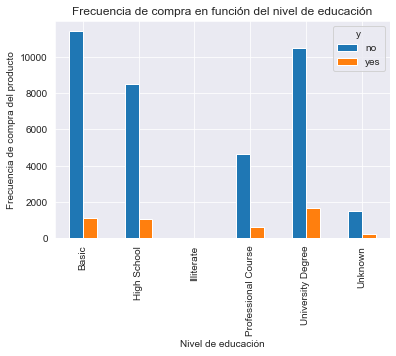

In [27]:
%matplotlib inline
pd.crosstab(data.education, data.y).plot(kind="bar")
plt.title("Frecuencia de compra en función del nivel de educación")
plt.xlabel("Nivel de educación")
plt.ylabel("Frecuencia de compra del producto")

Text(0, 0.5, 'Frecuencia de compra del producto')

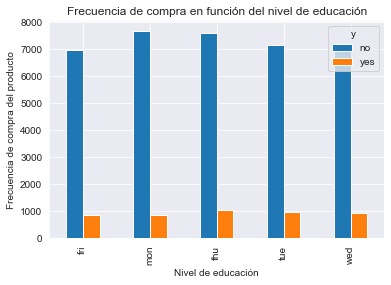

In [28]:
%matplotlib inline
pd.crosstab(data.day_of_week, data.y).plot(kind="bar")
plt.title("Frecuencia de compra en función del nivel de educación")
plt.xlabel("Nivel de educación")
plt.ylabel("Frecuencia de compra del producto")

Text(0, 0.5, 'Frecuencia de compra del producto')

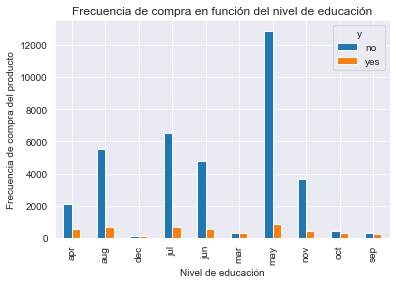

In [29]:
%matplotlib inline
pd.crosstab(data.month, data.y).plot(kind="bar")
plt.title("Frecuencia de compra en función del nivel de educación")
plt.xlabel("Nivel de educación")
plt.ylabel("Frecuencia de compra del producto")

Text(0, 0.5, 'Cliente')

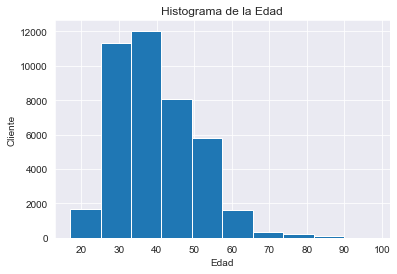

In [30]:
%matplotlib inline
data.age.hist()
plt.title("Histograma de la Edad")
plt.xlabel("Edad")
plt.ylabel("Cliente")

In [31]:
#this function returns categorical variables
def return_categorical(df):

  categorical_columns = [column_name for column_name in df if df[column_name].dtype == 'O']
  return categorical_columns

#this function returns numerical variables
def return_numerical(df):

  return list(set(df.columns) - set(return_categorical(df)))

def check_normal(df):
  fig, axes = plt.subplots(1,len(return_numerical(df)), figsize =(70, 10))

  for i,numeric_column_name in enumerate(list(set(df.columns) -set(return_categorical(df)))):

    sns.distplot(df[numeric_column_name], ax=axes[i]);
    plt.title(f'Distribution of {numeric_column_name}');

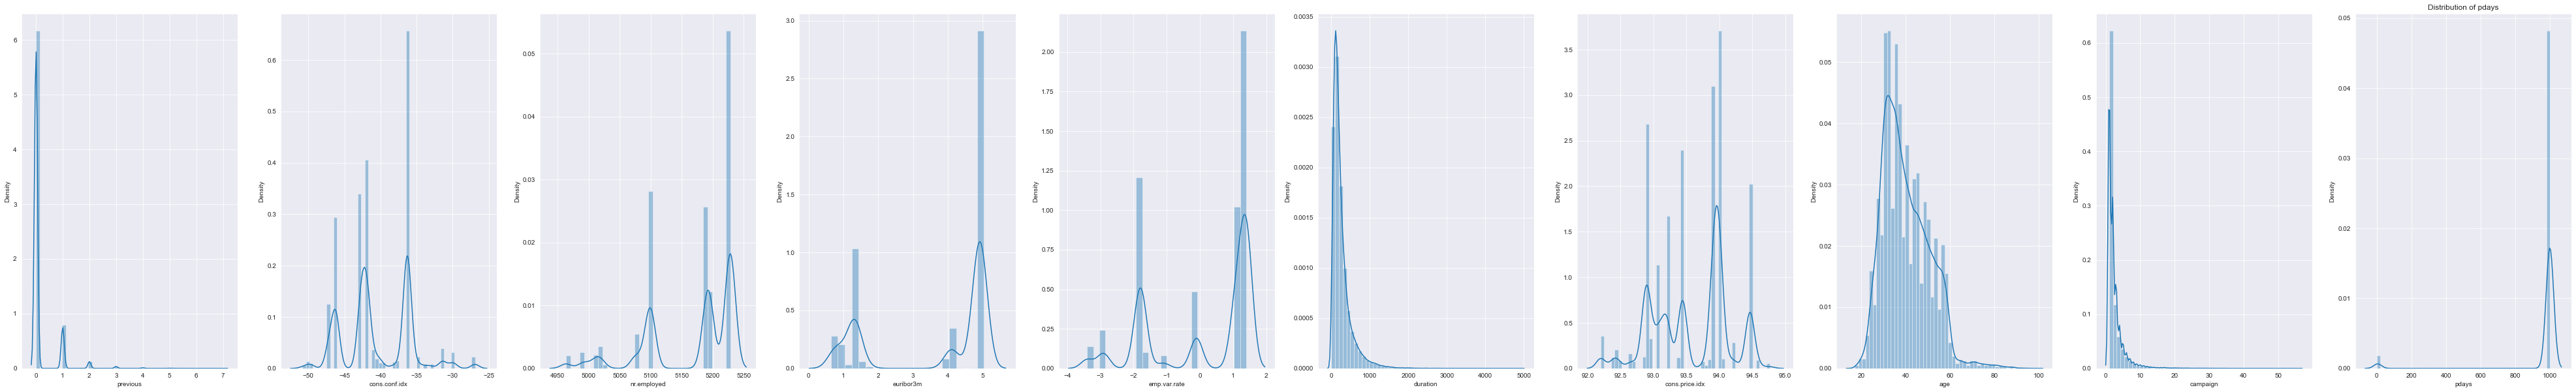

In [32]:
check_normal(data)

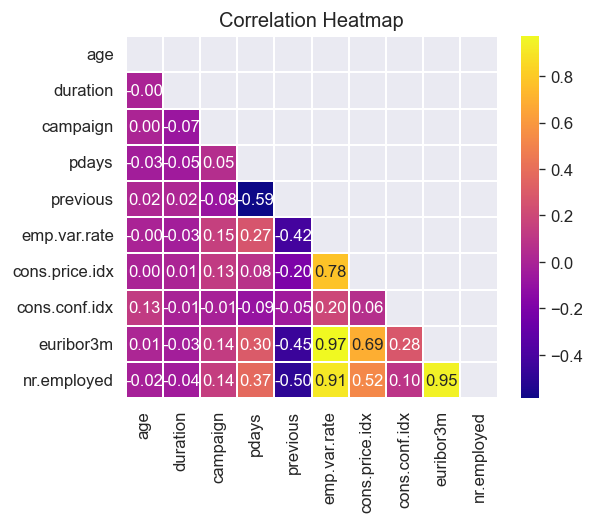

In [33]:
#Correlaciones
plt.figure(dpi = 120,figsize= (5,4))
mask = np.triu(np.ones_like(data.corr(),dtype = bool))
sns.heatmap(data.corr(),mask = mask, fmt = ".2f",annot=True,lw=1,cmap = 'plasma')
plt.yticks(rotation = 0)
plt.xticks(rotation = 90)
plt.title('Correlation Heatmap')
plt.show()

In [35]:
corr = data.corr()
corr_greater_than_75 = corr[corr>=.75]
corr_greater_than_75

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
duration,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
campaign,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pdays,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
previous,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
emp.var.rate,NaN,NaN,NaN,NaN,NaN,1.000000,0.775334,NaN,0.972245,0.906970
cons.price.idx,NaN,NaN,NaN,NaN,NaN,0.775334,1.000000,NaN,NaN,NaN
cons.conf.idx,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
euribor3m,NaN,NaN,NaN,NaN,NaN,0.972245,NaN,NaN,1.000000,0.945154
nr.employed,NaN,NaN,NaN,NaN,NaN,0.906970,NaN,NaN,0.945154,1.000000


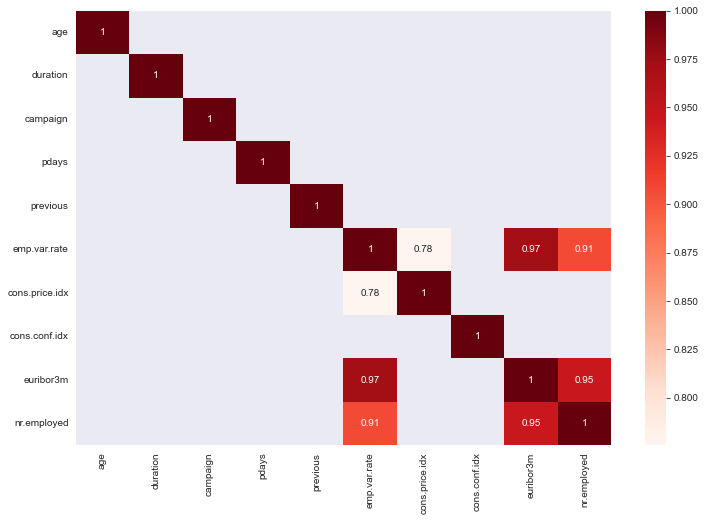

In [36]:
plt.figure(figsize=(12,8))
sns.heatmap(corr_greater_than_75, cmap="Reds", annot = True);

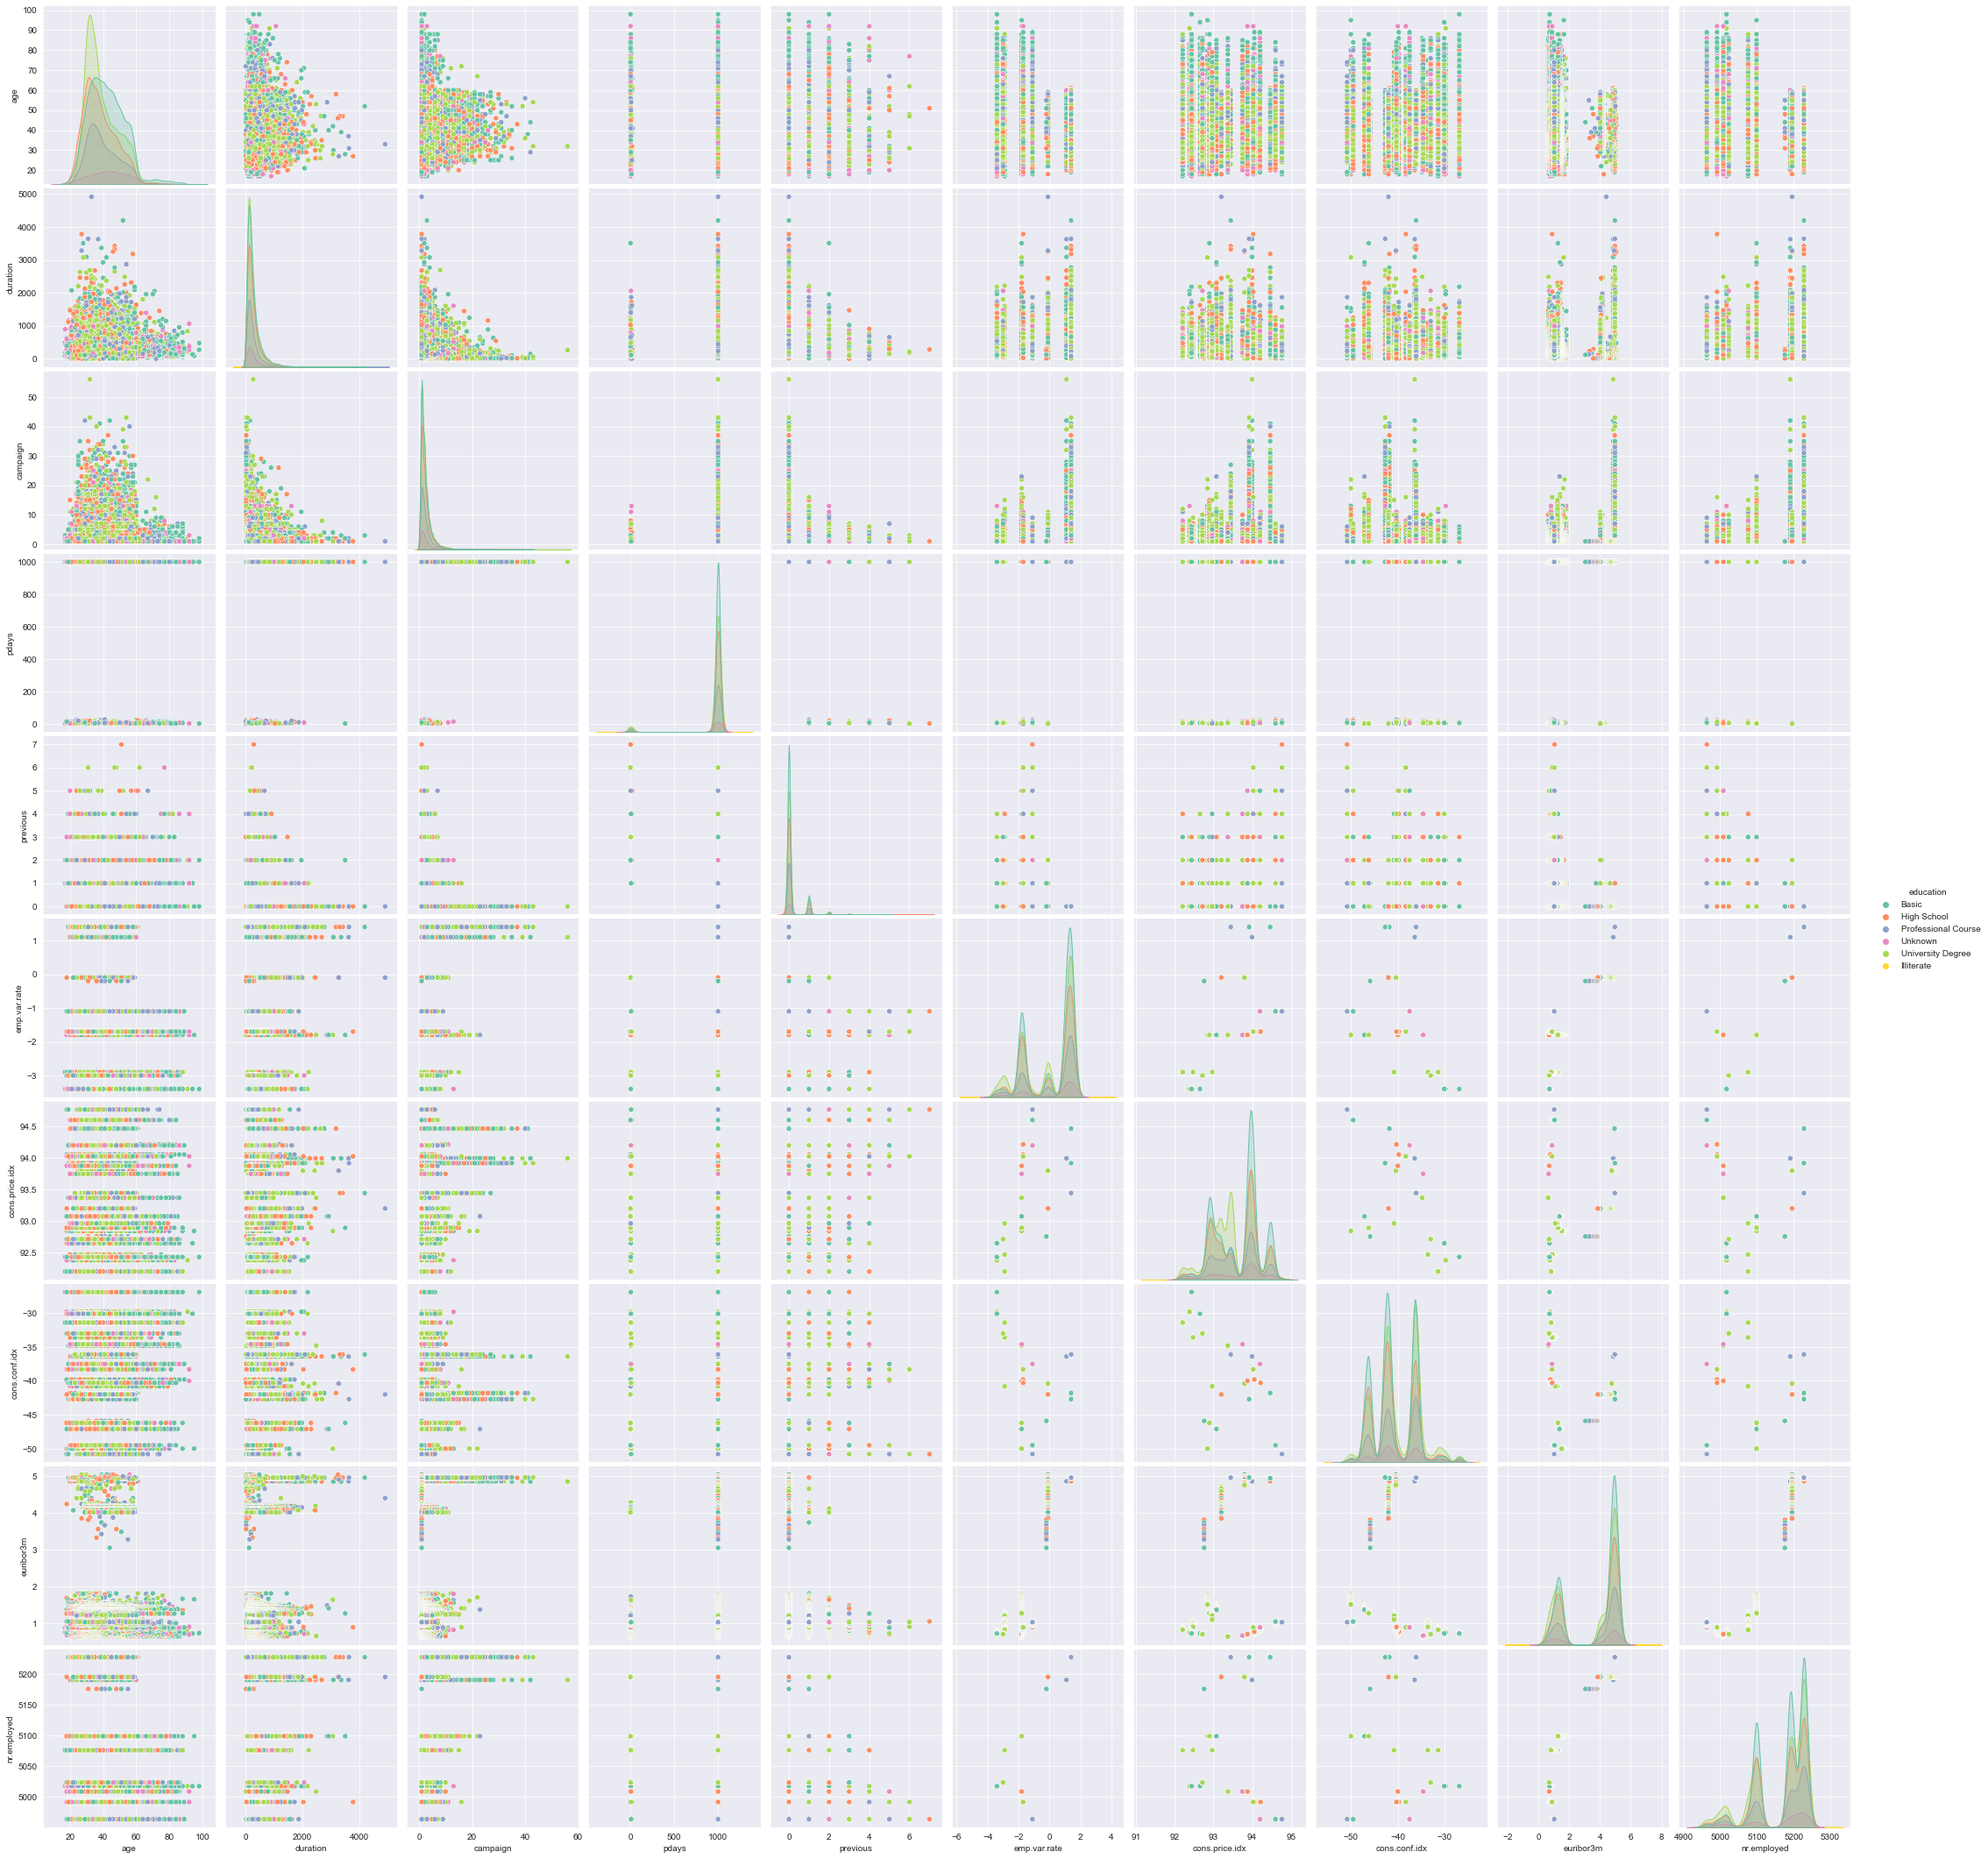

In [37]:
#Pairplot
sns.pairplot(data,hue = 'education' , size = 3 , palette = 'Set2')

10 minutos procesando datos, para poder visualizarlos.

### Modelo

#### Conversión de las variables categóricas a dummies

In [77]:
categories = ["job", "marital", "education", "housing", "loan", "contact", 
              "month", "day_of_week", "poutcome"]
for category in categories:
    cat_list = "cat"+ "_"+category
    cat_dummies = pd.get_dummies(data[category], prefix=category)
    data_new = data.join(cat_dummies)
    data = data_new

In [78]:
data_vars = data.columns.values.tolist()
data_vars

['age',
 'job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed',
 'y',
 'job_admin.',
 'job_blue-collar',
 'job_entrepreneur',
 'job_housemaid',
 'job_management',
 'job_retired',
 'job_self-employed',
 'job_services',
 'job_student',
 'job_technician',
 'job_unemployed',
 'job_unknown',
 'marital_divorced',
 'marital_married',
 'marital_single',
 'marital_unknown',
 'education_Basic',
 'education_High School',
 'education_Illiterate',
 'education_Professional Course',
 'education_University Degree',
 'education_Unknown',
 'housing_no',
 'housing_unknown',
 'housing_yes',
 'loan_no',
 'loan_unknown',
 'loan_yes',
 'contact_cellular',
 'contact_telephone',
 'month_apr',
 'month_aug',
 'month_dec',
 'month_jul',
 'month_jun',
 'month_mar',
 'month_may',
 'month_nov',
 'month_oct',
 'month_sep',
 '

In [79]:
to_keep = [v for v in data_vars if v not in categories]
to_keep = [v for v in to_keep if v not in ["default"]]

In [80]:
bank_data = data[to_keep]
bank_data.columns.values

array(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_Basic', 'education_High School',
       'education_Illiterate', 'education_Professional Course',
       'education_University Degree', 'education_Unknown', 'housing_no',
       'housing_unknown', 'housing_yes', 'loan_no', 'loan_unknown',
       'loan_yes', 'contact_cellular', 'contact_telephone', 'month_apr',
       'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar',
       'month_may', 'month_nov', 'month_oct', 'month_sep',
       'day_of_week_fri', 'day_of_week_mon', 'day_of_week_thu',
       'd

In [81]:
bank_data_vars = bank_data.columns.values.tolist()
Y = ['y']
X = [v for v in bank_data_vars if v not in Y]

### Selección de rasgos para el modelo

In [83]:
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [84]:
rfe = RFE(lr, n_features_to_select=12)
rfe = rfe.fit(bank_data[X], bank_data[Y].values.ravel())

In [85]:
print(rfe.support_)

[False False False False False False False False  True False False  True
 False False False  True False False  True False False False False False
 False False False False False False False False False False False False
 False False False False  True  True False False False  True  True  True
 False False False  True False False False  True False  True]


In [86]:
z=zip(bank_data_vars,rfe.support_, rfe.ranking_)

In [87]:
list(z)

[('age', False, 43),
 ('duration', False, 37),
 ('campaign', False, 17),
 ('pdays', False, 40),
 ('previous', False, 2),
 ('emp.var.rate', False, 20),
 ('cons.price.idx', False, 27),
 ('cons.conf.idx', False, 23),
 ('euribor3m', True, 1),
 ('nr.employed', False, 33),
 ('y', False, 14),
 ('job_admin.', True, 1),
 ('job_blue-collar', False, 24),
 ('job_entrepreneur', False, 42),
 ('job_housemaid', False, 38),
 ('job_management', True, 1),
 ('job_retired', False, 44),
 ('job_self-employed', False, 7),
 ('job_services', True, 1),
 ('job_student', False, 29),
 ('job_technician', False, 31),
 ('job_unemployed', False, 46),
 ('job_unknown', False, 41),
 ('marital_divorced', False, 30),
 ('marital_married', False, 15),
 ('marital_single', False, 47),
 ('marital_unknown', False, 26),
 ('education_Basic', False, 21),
 ('education_High School', False, 45),
 ('education_Illiterate', False, 16),
 ('education_Professional Course', False, 11),
 ('education_University Degree', False, 10),
 ('education

In [88]:
cols = ["previous", "euribor3m", "job_blue-collar", "job_retired", "month_aug", "month_dec", 
        "month_jul", "month_jun", "month_mar", "month_nov", "day_of_week_wed", "poutcome_nonexistent"]

In [89]:
X = bank_data[cols]
Y = bank_data["y"]

#### Validación del modelo logístico

In [90]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3, random_state=0)

In [91]:
logit_model = linear_model.LogisticRegression()

In [94]:
lm = linear_model.LogisticRegression()
lm.fit(X_train, Y_train)

LogisticRegression()

In [95]:
from IPython.display import display, Math, Latex

In [96]:
display(Math(r'Y_p=\begin{cases}0& si\ p\leq0.5\\1&si\ p >0.5\end{cases}'))

<IPython.core.display.Math object>

In [98]:
probs = lm.predict_proba(X_test)
probs

array([[0.95582067, 0.04417933],
       [0.8839411 , 0.1160589 ],
       [0.96438755, 0.03561245],
       ...,
       [0.82531482, 0.17468518],
       [0.97057471, 0.02942529],
       [0.94722844, 0.05277156]])

In [100]:
prediction = lm.predict(X_test)
prediction

array(['no', 'no', 'no', ..., 'no', 'no', 'no'], dtype=object)

In [101]:
prob = probs[:,1]
prob_df = pd.DataFrame(prob)
threshold = 0.1
prob_df["prediction"] = np.where(prob_df[0]>threshold, 1, 0)
prob_df.head()

,0,prediction
0,0.044179,0
1,0.116059,1
2,0.035612,0
3,0.047465,0
4,0.043369,0


In [102]:
pd.crosstab(prob_df.prediction, columns="count")

col_0,count
prediction,
0,8282
1,4075


In [105]:
threshold = 0.15
prob_df["prediction"] = np.where(prob_df[0]>threshold, 1, 0)
pd.crosstab(prob_df.prediction, columns="count")

col_0,count
prediction,
0,9007
1,3350


In [106]:
prob_df.head()

,0,prediction
0,0.044179,0
1,0.116059,0
2,0.035612,0
3,0.047465,0
4,0.043369,0


In [108]:
3350/len(prob_df)*100

27.110140001618515

In [107]:
threshold = 0.05
prob_df["prediction"] = np.where(prob_df[0]>threshold, 1, 0)
pd.crosstab(prob_df.prediction, columns="count")

col_0,count
prediction,
0,4659
1,7698


In [109]:
7698/len(prob_df)*100

62.296673949987856

In [111]:
metrics.accuracy_score(Y_test, prediction)

0.890507404709881

#### Validación cruzada

In [112]:
from sklearn.model_selection import cross_val_score

In [113]:
scores = cross_val_score(linear_model.LogisticRegression(), X, Y, scoring="accuracy", cv=10)

In [114]:
scores

array([0.8873513 , 0.8873513 , 0.8873513 , 0.8873513 , 0.8873513 ,
       0.88880796, 0.88759408, 0.9184268 , 0.89606605, 0.44171928])

In [115]:
scores.mean()

0.8469370668932432